In [4]:
using Plots, NLSolvers # define packages

In [26]:
function sigmoid(V,c,Vr)
    return 1 ./ exp.(-c .* (V.-Vr))
end
c = 1.82
Vr = 3
# V is a function of x and t (matrix, x on the rows and t on the columns)
# v = # propagation velocity
# h = # impulse response function
# S = sigmoid(V,c,Vr) # wave-pulse conversion function

function correction_function(L,eta,du)    # ask how should we replace Taylor expansion in of sigmoid function
    return (1/eta).*exp.(-eta.*L).*(sigmoid(L,c,Vr).+(sigmoid(L,c,Vr)-sigmoid(L-du,c,Vr))./(eta.*du))
end

function connectivity_function(x,eta)  # if excitatory: eta = 1, a = ae
    return eta.*exp.(-x.*eta)         # if inhibitory: eta = r, a = ai
end
# r = # excitatory to inhibitory range ratio
# Ie = connectivity_function(x,1)
# Ii = connectivity_function(x,r)

function integral_function(Vrow,eta,du)
    l = length(Vrow);
    a = 1/((eta^2)*du);
    b = (1/eta)*(sigmoid(0.,c,Vr)+(sigmoid(du,c,Vr)-sigmoid(0.,c,Vr))/(eta*du));
    K = correction_function(L,eta,du);
    cc = zeros(1,l-2)
    for i = 1:l-2
        cc[i] = exp.(-eta.*Vrow[i+1]).*(sigmoid(Vrow[i+2],c,Vr)-2 .*sigmoid(Vrow[i+1],c,Vr).+sigmoid(Vrow[i],c,Vr));
    end
    summ = sum(cc)
    return a.*b.*summ - K
end


integral_function (generic function with 1 method)

In [45]:
## Turing Patterns ##
ae = 6.;     # excitatory strenght
ai = 5.;     # inhibitory strenght
re = 0.0005;    # excitatory range (m)
ri = 0.001;     # inhibitory range (m)
r = re/ri;   # ratio
L = 0.05;    # Total length (m)
N = 400;     # Number of mesh
du = L/N;
x = range(0,L,length=N+1);
dt = 0.05;   # time step
v = 0.08;    # propagation velocity (m/s)
muP0 = 2.5;   # external stimulus (constant)
Vrow = range(1,6,length=N+1);
J = ae.*integral_function(Vrow,1,du) .- ai.*integral_function(Vrow,r,du)
display(J)



-2280.135633570372

In [14]:
## Waves ##
re = 0.001;       # excitatory range (m)
v = 0.16;         # propagation velocity (m/s)

In [15]:
## Homogeneous external stimuli
muP0 = 2.5;       # external stimulus (constant)
r = 2.8;          # ratio
ri = re/r;        # inhibitory range (m)
ai = 40.;         # excitatory strenght
ae = 41.;         # inhibitory strenght

In [16]:
## Inhimogeneous external stimulation
muP0 = 2.5;
function muP(x,t)
    return
end
ri = 0.0001;
re = 0.001;
r = re/ri;
ai = 100.;
ae = 101.;

LoadError: cannot define function muP; it already has a value

In [46]:
t = 0:0.05:100;   # not sure
V = zeros(length(t),N+1);
S = V;
phi = V;
V[1,:] = Vrow;
epsilon = 0.1
for i = 1:length(t)-1
    V[i+1,:] = V[i,:] .+ epsilon.*phi[i+1]
    phi[i+1,:] = phi[i] .+ epsilon.*(-2 .*phi[i] .- V[i,:] .+ J .+ muP0)
end



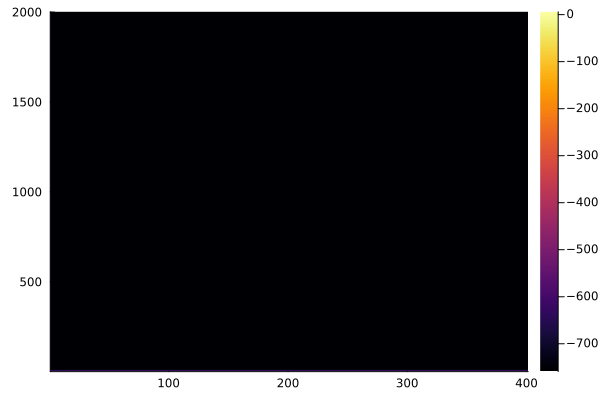

In [47]:
heatmap(V)

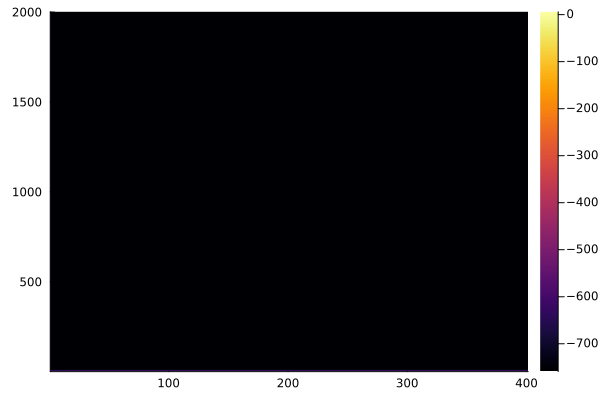

In [48]:
heatmap(phi)